In [1]:
import pandas as pd
import os

filepath = 'C:/Users/dmarc/Desktop/Energy_project/data/EWELD_raw/Electricity Consumption/'
sections = os.listdir(filepath)


## STEP 1 Energy consumption all users consolidation
combined_df

In [2]:
dataframes = []

for section in sections:
    section_path = os.path.join(filepath, section)
    if os.path.isdir(section_path):
        divisions = os.listdir(section_path)
        for division in divisions:
            division_path = os.path.join(section_path, division)
            if os.path.isdir(division_path):
                files = os.listdir(division_path)
                csv_files = [f for f in files if f.endswith('.csv')]
                for csv_file in csv_files:
                    file_path = os.path.join(division_path, csv_file)
                    df = pd.read_csv(file_path)
                    df['User'] = os.path.splitext(csv_file)[0]      # e.g., 'U1'
                    df['Division'] = division                       # e.g., 'Division_01'
                    df['Section'] = section                         # e.g., 'Section_A'
                    dataframes.append(df)

# Combine all into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
print(combined_df.head())

                  Time    Value User  \
0  2016-07-12 10:30:00  20.3325   U1   
1  2016-07-12 10:45:00  16.8611   U1   
2  2016-07-12 11:00:00  16.2412   U1   
3  2016-07-12 11:15:00  18.8448   U1   
4  2016-07-12 11:30:00  17.3570   U1   

                                            Division Section  
0  A01 Crop and animal production, hunting and re...       A  
1  A01 Crop and animal production, hunting and re...       A  
2  A01 Crop and animal production, hunting and re...       A  
3  A01 Crop and animal production, hunting and re...       A  
4  A01 Crop and animal production, hunting and re...       A  


In [3]:
combined_df.columns

Index(['Time', 'Value', 'User', 'Division', 'Section'], dtype='object')

In [4]:
# Extract numeric part from 'Division' as 'Division Code'
combined_df['Division Code'] = combined_df['Division'].str.extract(r'(\d+)')

# Extract the text part after the code as 'Division Name'
combined_df['Division Name'] = combined_df['Division'].str.replace(r'^[A-Z]?(\d+)\s*', '', regex=True)

# Replace column name 'Division' with 'Division Code'
combined_df['Division'] = combined_df['Division Code']

# Drop 'Division Code' column 
combined_df.drop(columns=['Division'], inplace=True)
print(combined_df.head())

                  Time    Value User Section Division Code  \
0  2016-07-12 10:30:00  20.3325   U1       A            01   
1  2016-07-12 10:45:00  16.8611   U1       A            01   
2  2016-07-12 11:00:00  16.2412   U1       A            01   
3  2016-07-12 11:15:00  18.8448   U1       A            01   
4  2016-07-12 11:30:00  17.3570   U1       A            01   

                                       Division Name  
0  Crop and animal production, hunting and relate...  
1  Crop and animal production, hunting and relate...  
2  Crop and animal production, hunting and relate...  
3  Crop and animal production, hunting and relate...  
4  Crop and animal production, hunting and relate...  


In [5]:
# Rename the column 
combined_df = combined_df.rename(columns={'Value': 'Energy_cons [kWh]'})


In [6]:
num_rows_combined_df = len(combined_df)
print(f"Number of rows combined_df: {num_rows_combined_df}")

Number of rows combined_df: 55277891


## STEP 2 Creation user data set for Section C "Manufacturing"
combined_C_df

In [7]:
# filter
combined_C_df = combined_df[combined_df['Section'] == 'C']
combined_C_df

,Time,Energy_cons [kWh],User,Section,Division Code,Division Name
1536781,2017-06-04 00:15:00,1.8156,U11,C,10,Manufacture of food products
1536782,2017-06-04 00:30:00,1.8156,U11,C,10,Manufacture of food products
1536783,2017-06-04 00:45:00,1.8156,U11,C,10,Manufacture of food products
1536784,2017-06-04 01:00:00,1.8156,U11,C,10,Manufacture of food products
1536785,2017-06-04 01:15:00,2.5140,U11,C,10,Manufacture of food products
...,...,...,...,...,...,...
37748213,2019-05-17 14:00:00,19.3786,U255,C,33,Repair and installation of machinery and equip...
37748214,2019-05-17 14:15:00,16.9465,U255,C,33,Repair and installation of machinery and equip...
37748215,2019-05-17 14:30:00,15.8481,U255,C,33,Repair and installation of machinery and equip...
37748216,2019-05-17 14:45:00,16.0835,U255,C,33,Repair and installation of machinery and equip...


In [8]:
# Drop the unwanted column
combined_C_df = combined_C_df.drop(columns=['Section'])

In [9]:
division_df = combined_C_df['Division Name'].value_counts().to_frame('Count')
division_df 

,Count
Division Name,
"Manufacture of fabricated metal products, except machinery and equipment",6448288
Manufacture of other non-metallic mineral products,4611696
Manufacture of rubber and plastics products,4504592
Manufacture of textiles,3561843
Manufacture of basic metals,3092492
Manufacture of furniture,3023620
"Manufacture of computer, electronic and optical products",1684764
Manufacture of machinery and equipment n.e.c,1611285
Manufacture of paper and paper products,1278260


In [10]:
num_rows = len(combined_df)
print(f"Number of rows all users: {num_rows}")
num_rows_C = len(combined_C_df)
print(f"Number of rows for selected section C: {num_rows_C}")

Number of rows all users: 55277891
Number of rows for selected section C: 36211437


In [11]:
# Show zeros per user in filtered data
zero_counts_C = (combined_C_df == 0).sum()
print("Number of Energy consumption = 0 for user from section C")
zero_counts_C

Number of Energy consumption = 0 for user from section C


Time                       0
Energy_cons [kWh]    8607472
User                       0
Division Code              0
Division Name              0
dtype: int64

In [12]:
# Count total values per user
total_counts = combined_C_df.groupby('User')[['Energy_cons [kWh]']].count()

# Count zeros per user
zero_counts = combined_C_df.groupby('User')[['Energy_cons [kWh]']].apply(lambda x: (x == 0).sum())

# Calculate percentage of zeros
percent_zeros = zero_counts / total_counts * 100

# Rename columns for clarity
zero_counts.columns = ['Energy_cons_zeros']
total_counts.columns = ['Energy_cons_total']
percent_zeros.columns = [ 'Energy_cons_zeros_percent']

# Combine all results into one DataFrame
summary_0_energy = pd.concat([total_counts, zero_counts, percent_zeros], axis=1)

# Round percentage columns
summary_0_energy['Energy_cons_zeros_percent'] = summary_0_energy['Energy_cons_zeros_percent'].round(2)

#sorted summary by the percentage
sorted_0_summary = summary_0_energy.sort_values('Energy_cons_zeros_percent', ascending=False)
print("Zero Values pre users (count and percentage)\n")
print(sorted_0_summary.head(30))

Zero Values pre users (count and percentage)

      Energy_cons_total  Energy_cons_zeros  Energy_cons_zeros_percent
User                                                                 
U106             142345             135853                      95.44
U41              195743             168153                      85.90
U119             181439             135072                      74.44
U104             160511             116518                      72.59
U128             154757             110221                      71.22
U162              98037              68769                      70.15
U117             148552             103927                      69.96
U125             150242              99826                      66.44
U58              140988              88820                      63.00
U229             195743             118991                      60.79
U30              194111             114962                      59.22
U216             154847              91480  

In [13]:
# Calculate total number of users to emiminate if o numbers is > 70%
total_users = len(sorted_0_summary)
detailed_summary = pd.DataFrame({
    'Percentage Range': ['0-30%', '30-50%', '50-70%', '70-100%', 'Total'],
    'User Count': [
        ((sorted_0_summary['Energy_cons_zeros_percent'] <= 30)).sum(),
        ((sorted_0_summary['Energy_cons_zeros_percent'] > 30) & 
         (sorted_0_summary['Energy_cons_zeros_percent'] <= 50)).sum(),
        ((sorted_0_summary['Energy_cons_zeros_percent'] > 50) & 
         (sorted_0_summary['Energy_cons_zeros_percent'] <= 70)).sum(),
        (sorted_0_summary['Energy_cons_zeros_percent'] > 70).sum(),
        total_users
    ],
    'Percentage of Users': [
        f"{((sorted_0_summary['Energy_cons_zeros_percent'] <= 30)).sum() / total_users * 100:.1f}%",
        f"{((sorted_0_summary['Energy_cons_zeros_percent'] > 30) & (sorted_0_summary['Energy_cons_zeros_percent'] <= 50)).sum() / total_users * 100:.1f}%",
        f"{((sorted_0_summary['Energy_cons_zeros_percent'] > 50) & (sorted_0_summary['Energy_cons_zeros_percent'] <= 70)).sum() / total_users * 100:.1f}%",
        f"{(sorted_0_summary['Energy_cons_zeros_percent'] > 70).sum() / total_users * 100:.1f}%",
        '100%'
    ]
})

print("\nDetailed Percentage Distribution of Zero Values in Section C:")
print(detailed_summary.to_string(index=False))


Detailed Percentage Distribution of Zero Values in Section C:
Percentage Range  User Count Percentage of Users
           0-30%         172               70.2%
          30-50%          43               17.6%
          50-70%          24                9.8%
         70-100%           6                2.4%
           Total         245                100%


In [14]:
combined_C_df['Time'] = pd.to_datetime(combined_C_df['Time'])


min_time = combined_C_df['Time'].min()
max_time = combined_C_df['Time'].max()

print("Min time value:", min_time)
print("Max time value:", max_time)

Min time value: 2016-06-02 00:15:00
Max time value: 2022-08-10 23:45:00


## STEP 3 Exclude users if their energy consumption remains above 70% for Users

raw_consumption_C

In [15]:
# List of users to exclude
users_to_exclude = ['U106', 'U41', 'U119', 'U104', 'U128', 'U162']

# Count zeros in original data (BEFORE exclusion)
zeros_before = (combined_C_df['Energy_cons [kWh]'] == 0).sum()
print(f"\nZero count in original data: {zeros_before}")

# Create filtered DataFrame by EXCLUDING these users
raw_consumption_C = combined_C_df[~combined_C_df['User'].isin(users_to_exclude)].copy()

# Verify the users and rows exclusion
print(f"\nOriginal number of users: {combined_C_df['User'].nunique()}")
print(f"Number of users after exclusion: {raw_consumption_C['User'].nunique()}")
print(f"Number of excluded users: {len(users_to_exclude)}")

# Count zeros in filtered data (AFTER exclusion)
zeros_after = (raw_consumption_C['Energy_cons [kWh]'] == 0).sum()
print(f"\nZero count in filtered data: {zeros_after}")

# Calculate how many zeros were excluded by this user filtering
zeros_excluded = zeros_before - zeros_after
print(f"\nNumber of 0 values excluded by user filtering: {zeros_excluded}")

# Print the excluded users
print("\nExcluded users:", users_to_exclude)


Zero count in original data: 8607472

Original number of users: 245
Number of users after exclusion: 239
Number of excluded users: 6

Zero count in filtered data: 7872886

Number of 0 values excluded by user filtering: 734586

Excluded users: ['U106', 'U41', 'U119', 'U104', 'U128', 'U162']


In [16]:
# data frame copy to fill
raw_consumption_C_0_linear = raw_consumption_C.copy()
raw_consumption_C_0_time = raw_consumption_C.copy()

## STEP 4 Fill remaining 0 values in Energy_cons [kWh] column with interpolated values 
raw_consumption_C_0_linear & raw_consumption_C_0_time

User grouping  -  linear interpolation (+ filling 0 energy values ​​ffill + bfill)

In [17]:
# 1. Data preparation - replace zeros with NaN for interpolation
raw_consumption_C_0_linear['Energy_cons [kWh]'] = raw_consumption_C_0_linear['Energy_cons [kWh]'].replace(0, float('nan'))

# 2. Linear interpolation grouped by user
raw_consumption_C_0_linear['Energy_cons_linear'] = (
    raw_consumption_C_0_linear
    .groupby('User')['Energy_cons [kWh]']
    .transform(lambda x: x.interpolate(method='linear')))

# 3. For remaining NaNs (at start/end of series) - fill with last known value
raw_consumption_C_0_linear['Energy_cons_linear'] = (
    raw_consumption_C_0_linear
    .groupby('User')['Energy_cons_linear']
    .transform(lambda x: x.ffill().bfill()))

print(type(raw_consumption_C_0_linear))
print(f"raw_consumption_C_0_linear shape: {raw_consumption_C_0_linear.shape}")

<class 'pandas.core.frame.DataFrame'>
raw_consumption_C_0_linear shape: (35278605, 6)


In [18]:
print(raw_consumption_C_0_linear.isna().sum())

Time                        0
Energy_cons [kWh]     7872886
User                        0
Division Code               0
Division Name               0
Energy_cons_linear          0
dtype: int64


In [19]:
# Checking time format
print("Sample time values:")
print(raw_consumption_C_0_linear['Time'].head())
print(f"\nData type of the Time column after linear interpolation: {raw_consumption_C_0_linear['Time'].dtype}")

Sample time values:
1536781   2017-06-04 00:15:00
1536782   2017-06-04 00:30:00
1536783   2017-06-04 00:45:00
1536784   2017-06-04 01:00:00
1536785   2017-06-04 01:15:00
Name: Time, dtype: datetime64[ns]

Data type of the Time column after linear interpolation: datetime64[ns]


Division Code grouping and time-based interpolation (+ filling 0 energy values ​​ffill + bfill)

In [20]:
# 0. First create DatetimeIndex (NEW STEP for time-based)
raw_consumption_C_0_time = raw_consumption_C_0_time.set_index('Time')

# 1. Data preparation - replace zeros with NaN
raw_consumption_C_0_time['Energy_cons [kWh]'] = raw_consumption_C_0_time['Energy_cons [kWh]'].replace(0, float('nan'))

# 2. Time-based interpolation grouped by Division Code
raw_consumption_C_0_time['Energy_cons_time'] = (
    raw_consumption_C_0_time
    .groupby('Division Code')['Energy_cons [kWh]']
    .transform(lambda x: x.interpolate(method='time')))

# 3. For remaining NaNs - fill with last known value
raw_consumption_C_0_time['Energy_cons_time'] = (
    raw_consumption_C_0_time
    .groupby('Division Code')['Energy_cons_time']
    .transform(lambda x: x.ffill().bfill()))

# 4. Reset index if needed (NEW STEP)
raw_consumption_C_0_time = raw_consumption_C_0_time.reset_index()

print(type(raw_consumption_C_0_time))
print(f"raw_consumption_C_0_time shape: {raw_consumption_C_0_time.shape}")

<class 'pandas.core.frame.DataFrame'>
raw_consumption_C_0_time shape: (35278605, 6)


In [21]:
# Checking time  format
print("Sample time values:")
print(raw_consumption_C_0_time['Time'].head())
print(f"\nData type of the Time column after time interpolation: {raw_consumption_C_0_time['Time'].dtype}")

Sample time values:
0   2017-06-04 00:15:00
1   2017-06-04 00:30:00
2   2017-06-04 00:45:00
3   2017-06-04 01:00:00
4   2017-06-04 01:15:00
Name: Time, dtype: datetime64[ns]

Data type of the Time column after time interpolation: datetime64[ns]


In [22]:
# interpolations verification
comparison_data = {
    'Statistic': [
        'Number of zeros (in original column)',
        'Number of NaN values (in interpolated column)',
        'Number of zeros excluded'
    ],
    'Before Interpolation': [
        (raw_consumption_C['Energy_cons [kWh]'] == 0).sum(),
        raw_consumption_C['Energy_cons [kWh]'].isna().sum(),
        None
    ],
    'After Linear Interpolation': [
        (raw_consumption_C_0_linear['Energy_cons [kWh]'] == 0).sum(),
        raw_consumption_C_0_linear['Energy_cons_linear'].isna().sum(),
        (raw_consumption_C['Energy_cons [kWh]'] == 0).sum() - (raw_consumption_C_0_linear['Energy_cons [kWh]'] == 0).sum()
    ],
    'After Time-based Interpolation': [
        (raw_consumption_C_0_time['Energy_cons [kWh]'] == 0).sum(),
        raw_consumption_C_0_time['Energy_cons_time'].isna().sum(),
        (raw_consumption_C['Energy_cons [kWh]'] == 0).sum() - (raw_consumption_C_0_time['Energy_cons [kWh]'] == 0).sum()
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index('Statistic', inplace=True)

comparison_df



,Before Interpolation,After Linear Interpolation,After Time-based Interpolation
Statistic,,,
Number of zeros (in original column),7872886.0,0,0
Number of NaN values (in interpolated column),0.0,0,0
Number of zeros excluded,NaN,7872886,7872886


In [23]:

print("\nSample rows:")
raw_consumption_C_0_linear.tail(10)[['User', 'Time', 'Energy_cons [kWh]', 'Energy_cons_linear']]




Sample rows:


,User,Time,Energy_cons [kWh],Energy_cons_linear
37748208,U255,2019-05-17 12:45:00,16.6327,16.6327
37748209,U255,2019-05-17 13:00:00,17.4957,17.4957
37748210,U255,2019-05-17 13:15:00,17.8880,17.8880
37748211,U255,2019-05-17 13:30:00,19.3786,19.3786
37748212,U255,2019-05-17 13:45:00,19.0648,19.0648
37748213,U255,2019-05-17 14:00:00,19.3786,19.3786
37748214,U255,2019-05-17 14:15:00,16.9465,16.9465
37748215,U255,2019-05-17 14:30:00,15.8481,15.8481
37748216,U255,2019-05-17 14:45:00,16.0835,16.0835
37748217,U255,2019-05-17 15:00:00,15.2989,15.2989


In [24]:
print("\nSample rows:")
raw_consumption_C_0_time.tail(10)[['User', 'Time', 'Energy_cons [kWh]', 'Energy_cons_time']]


Sample rows:


,User,Time,Energy_cons [kWh],Energy_cons_time
35278595,U255,2019-05-17 12:45:00,16.6327,16.6327
35278596,U255,2019-05-17 13:00:00,17.4957,17.4957
35278597,U255,2019-05-17 13:15:00,17.8880,17.8880
35278598,U255,2019-05-17 13:30:00,19.3786,19.3786
35278599,U255,2019-05-17 13:45:00,19.0648,19.0648
35278600,U255,2019-05-17 14:00:00,19.3786,19.3786
35278601,U255,2019-05-17 14:15:00,16.9465,16.9465
35278602,U255,2019-05-17 14:30:00,15.8481,15.8481
35278603,U255,2019-05-17 14:45:00,16.0835,16.0835
35278604,U255,2019-05-17 15:00:00,15.2989,15.2989


In [25]:
# Orginal energy value and interpolations desctiptions
energy_cons_stats = pd.DataFrame({
    'Original Energy_cons': raw_consumption_C['Energy_cons [kWh]'].describe(),
    'Linear Interpolated': raw_consumption_C_0_linear['Energy_cons_linear'].describe(),
    'Time-based Interpolated': raw_consumption_C_0_time['Energy_cons_time'].describe()
})

energy_cons_stats

,Original Energy_cons,Linear Interpolated,Time-based Interpolated
count,3.527860e+07,3.527860e+07,3.527860e+07
mean,7.950134e+01,9.664757e+01,9.819568e+01
std,2.562304e+02,2.715120e+02,2.786002e+02
min,0.000000e+00,4.992669e-05,4.992669e-05
25%,2.815000e-01,5.599400e+00,4.656400e+00
50%,1.135790e+01,2.501150e+01,2.372440e+01
75%,5.278010e+01,7.169220e+01,7.239930e+01
max,7.977196e+03,7.977196e+03,7.977196e+03


In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Set plot style
plt.style.use('ggplot')

# Prepare common data - use only indices present in all datasets
common_index = raw_consumption_C.index.intersection(
    raw_consumption_C_0_linear.index).intersection(
    raw_consumption_C_0_time.index)

# Create a random sample (max 2000 points) from common indices and sort
sample_size = min(2000, len(common_index))
sampled_index = np.random.choice(common_index, size=sample_size, replace=False)
plot_data = raw_consumption_C.loc[sampled_index].sort_index()

# Add interpolation data to the DataFrame
plot_data['Linear'] = raw_consumption_C_0_linear.loc[sampled_index, 'Energy_cons_linear']
plot_data['Time'] = raw_consumption_C_0_time.loc[sampled_index, 'Energy_cons_time']

# Calculate common Y-axis limits for consistent scaling across plots
y_min = min(plot_data['Energy_cons [kWh]'].min(),
            plot_data['Linear'].min(),
            plot_data['Time'].min()) * 0.9
y_max = max(plot_data['Energy_cons [kWh]'].max(),
            plot_data['Linear'].max(),
            plot_data['Time'].max()) * 1.1

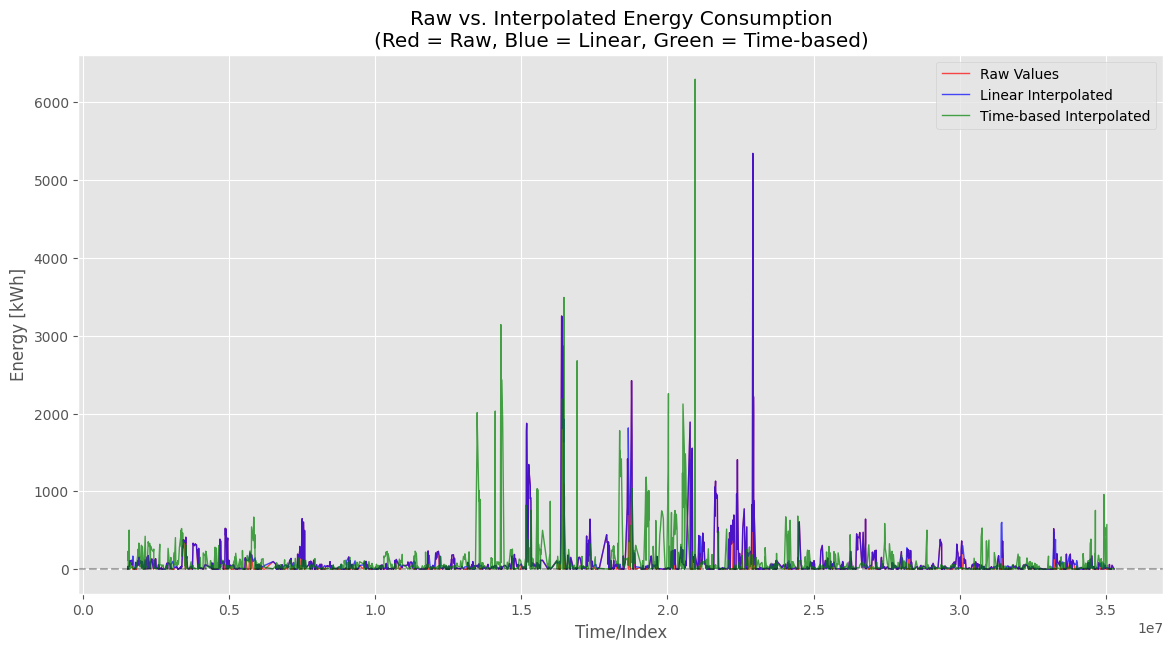

In [ ]:

# PLOT 1: Combined view of all three datasets

plt.figure(figsize=(14, 7))

# Original data (red)
plt.plot(plot_data.index, 
         plot_data['Energy_cons [kWh]'], 
         color='red', 
         alpha=0.7,
         linewidth=1,
         label='Raw Values')

# Plot INTERPOLATED linear data (blue)
plt.plot(plot_data.index, 
         plot_data['Linear'], 
         color='blue',
         alpha=0.7, 
         linewidth=1,
         label='Linear Interpolated')

# Plot INTERPOLATED time data (green)
plt.plot(plot_data.index, 
         plot_data['Time'], 
         color='green',
         alpha=0.7, 
         linewidth=1,
         label='Time-based Interpolated')

# Customize plot
plt.title('Raw vs. Interpolated Energy Consumption\n(Red = Raw, Blue = Linear, Green = Time-based)')
plt.xlabel('Time/Index')
plt.ylabel('Energy [kWh]')
plt.legend()
plt.grid(True)

# Add zero-line reference
plt.axhline(0, color='black', linestyle='--', alpha=0.3)

plt.show()

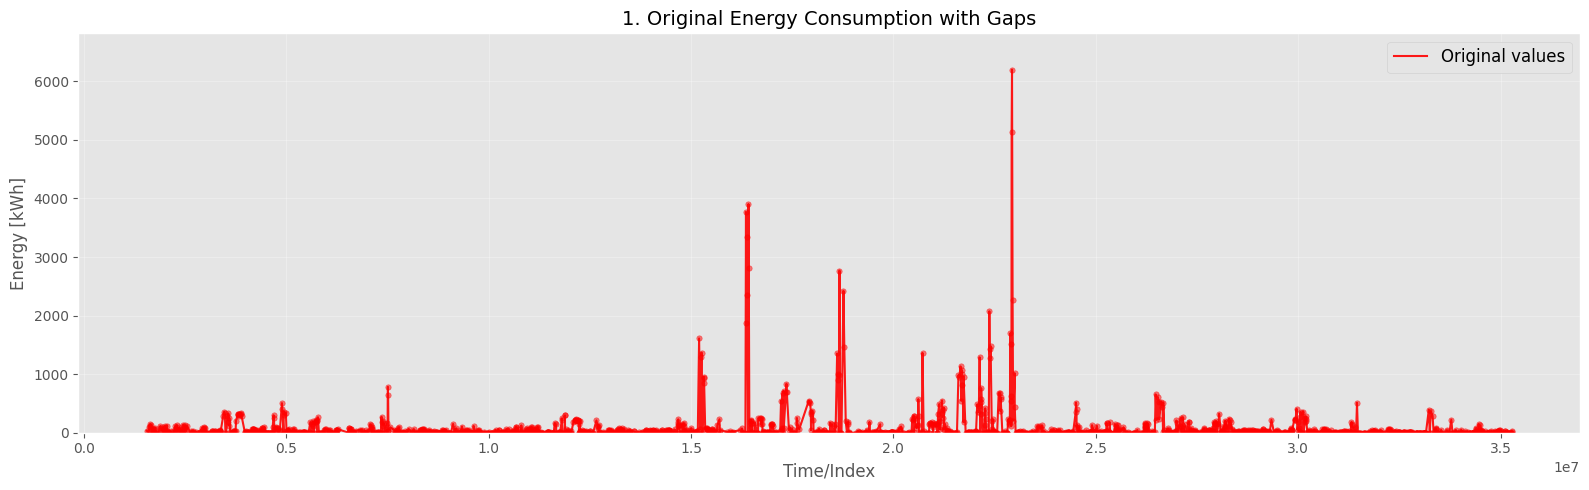

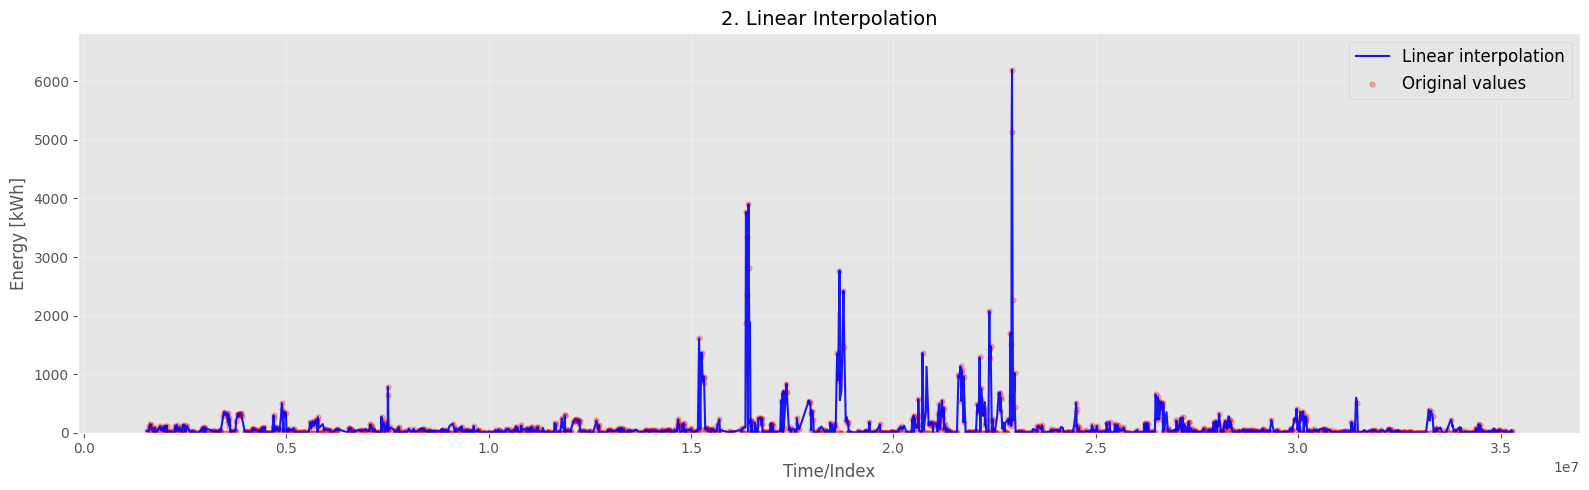

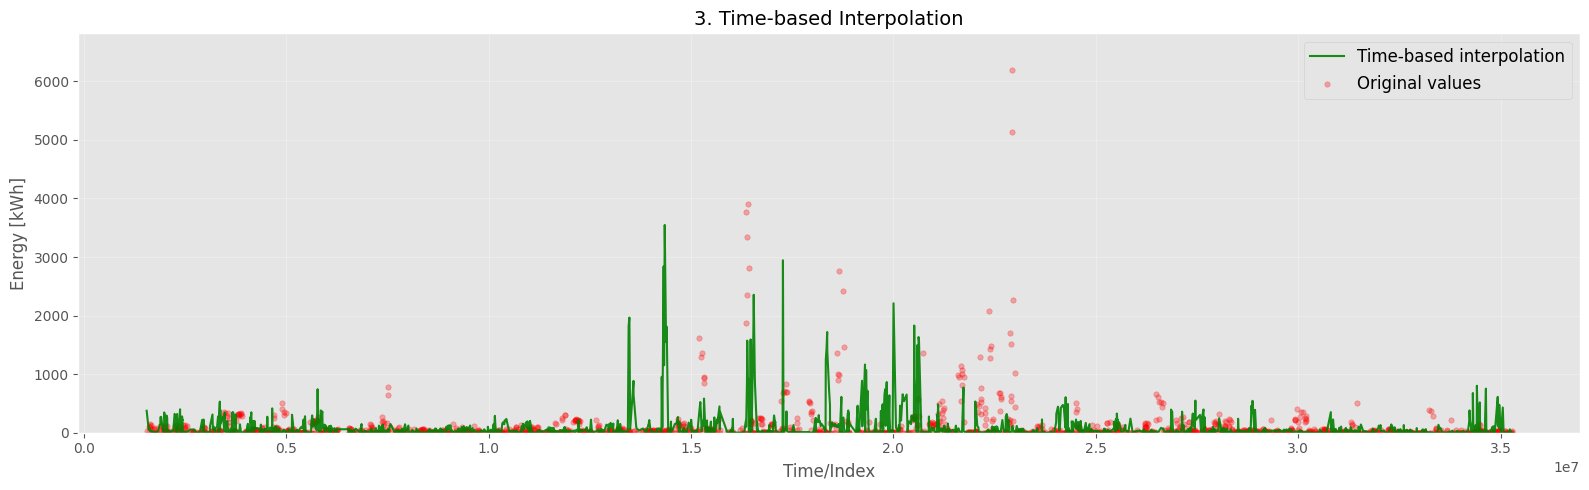

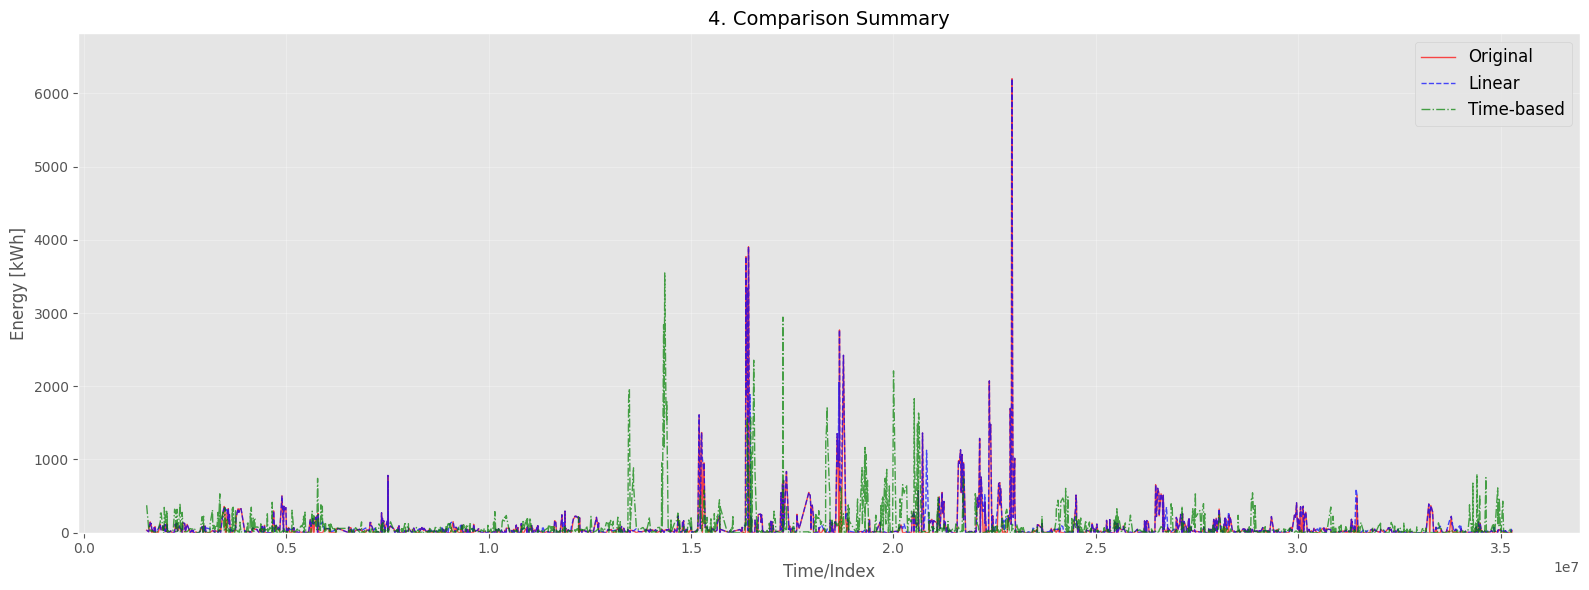

In [ ]:
# PLOT 2: Individual plots with English comments

# FIGURE 1: ORIGINAL DATA
plt.figure(figsize=(16, 5))
plt.plot(plot_data.index, plot_data['Energy_cons [kWh]'], 
         color='red', linewidth=1.5, alpha=0.9, label='Original values')
plt.scatter(plot_data.index, plot_data['Energy_cons [kWh]'],
            color='red', s=15, alpha=0.5)
plt.title('1. Original Energy Consumption with Gaps', fontsize=14)
plt.xlabel('Time/Index', fontsize=12)
plt.ylabel('Energy [kWh]', fontsize=12)
plt.ylim(y_min, y_max)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# FIGURE 2: LINEAR INTERPOLATION
plt.figure(figsize=(16, 5))
plt.plot(plot_data.index, plot_data['Linear'], 
         color='blue', linewidth=1.5, alpha=0.9, label='Linear interpolation')
plt.scatter(plot_data.index, plot_data['Energy_cons [kWh]'],
            color='red', s=15, alpha=0.3, label='Original values')
plt.title('2. Linear Interpolation', fontsize=14)
plt.xlabel('Time/Index', fontsize=12)
plt.ylabel('Energy [kWh]', fontsize=12)
plt.ylim(y_min, y_max)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# FIGURE 3: TIME-BASED INTERPOLATION
plt.figure(figsize=(16, 5))
plt.plot(plot_data.index, plot_data['Time'], 
         color='green', linewidth=1.5, alpha=0.9, label='Time-based interpolation')
plt.scatter(plot_data.index, plot_data['Energy_cons [kWh]'],
            color='red', s=15, alpha=0.3, label='Original values')
plt.title('3. Time-based Interpolation', fontsize=14)
plt.xlabel('Time/Index', fontsize=12)
plt.ylabel('Energy [kWh]', fontsize=12)
plt.ylim(y_min, y_max)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# FIGURE 4: COMPARISON SUMMARY
plt.figure(figsize=(16, 6))
plt.plot(plot_data.index, plot_data['Energy_cons [kWh]'], 
         color='red', linewidth=1, alpha=0.7, label='Original')
plt.plot(plot_data.index, plot_data['Linear'], 
         color='blue', linestyle='--', linewidth=1, alpha=0.7, label='Linear')
plt.plot(plot_data.index, plot_data['Time'], 
         color='green', linestyle='-.', linewidth=1, alpha=0.7, label='Time-based')
plt.title('4. Comparison Summary', fontsize=14)
plt.xlabel('Time/Index', fontsize=12)
plt.ylabel('Energy [kWh]', fontsize=12)
plt.ylim(y_min, y_max)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


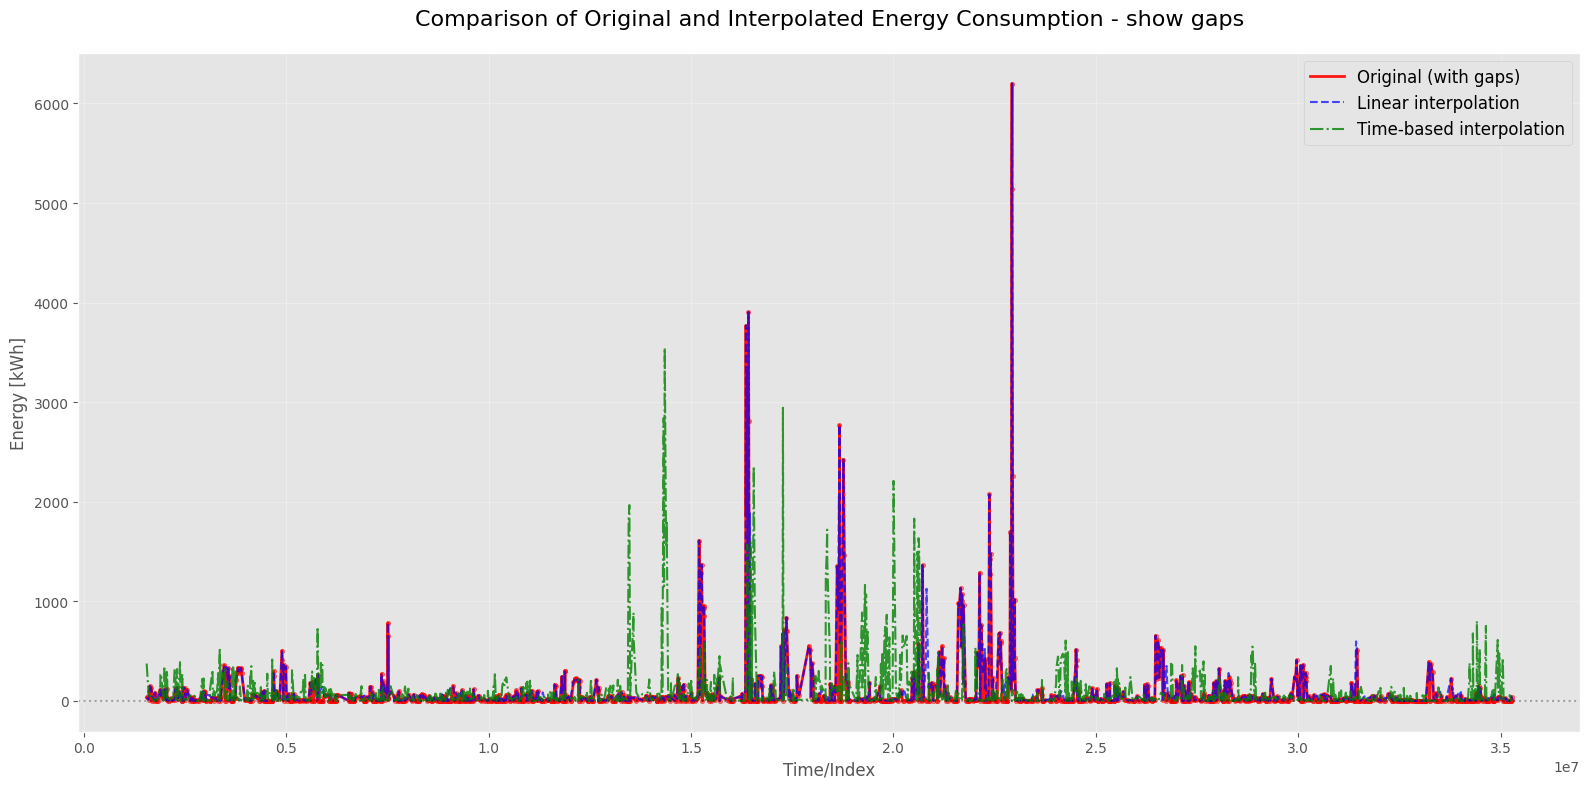

In [28]:

# PLOT - comparison plot with additional information

plt.figure(figsize=(16, 8))

# Draw each data series with different styles
plt.plot(plot_data.index, plot_data['Energy_cons [kWh]'], 
         color='red', linewidth=2, alpha=0.9, label='Original (with gaps)')

plt.plot(plot_data.index, plot_data['Linear'], 
         color='blue', linestyle='--', linewidth=1.5, alpha=0.7, label='Linear interpolation')

plt.plot(plot_data.index, plot_data['Time'], 
         color='green', linestyle='-.', linewidth=1.5, alpha=0.8, label='Time-based interpolation')

# Add points for original data to better show gaps
plt.scatter(plot_data.index, plot_data['Energy_cons [kWh]'], 
            color='red', s=10, alpha=0.5)

# Chart configuration
plt.title('Comparison of Original and Interpolated Energy Consumption - show gaps', fontsize=16, pad=20)
plt.xlabel('Time/Index', fontsize=12)
plt.ylabel('Energy [kWh]', fontsize=12)
plt.legend(fontsize=12, framealpha=0.9)
plt.grid(True, alpha=0.3)

# Additional enhancements
plt.axhline(0, color='black', linestyle=':', alpha=0.3)
plt.tight_layout()

plt.show()

In [ ]:
# evaluation effectiveness of two interpolation methods for energy consumption data
from sklearn.metrics import mean_absolute_error, mean_squared_error

def compare_interpolation_methods(original_df, linear_df, time_df, n_test_samples=1000, random_seed=42):
    """
    Robust comparison of interpolation methods with index alignment
    """
    np.random.seed(random_seed)
    
    # Step 1: Ensure indices are aligned
    if not original_df.index.equals(linear_df.index):
        linear_df = linear_df.reindex(original_df.index)
    if not original_df.index.equals(time_df.index):
        time_df = time_df.reindex(original_df.index)
    
    # Step 2: Select random non-zero indices
    non_zero_mask = (original_df['Energy_cons [kWh]'] > 0)
    valid_indices = original_df[non_zero_mask].index
    test_indices = np.random.choice(valid_indices, size=min(n_test_samples, len(valid_indices)), replace=False)
    
    original_values = original_df.loc[test_indices, 'Energy_cons [kWh]']
    
    results = []
    for method, df, col_name in [
        ('linear', linear_df, 'Energy_cons_linear'),
        ('time', time_df, 'Energy_cons_time')
    ]:
        # Ensure we only use existing indices
        common_indices = df.index.intersection(test_indices)
        pred_values = df.loc[common_indices, col_name]
        original_subset = original_values.loc[common_indices]
        
        mask = ~np.isnan(pred_values)
        if mask.sum() > 0:
            y_true = original_subset[mask]
            y_pred = pred_values[mask]
            results.append({
                'Method': method,
                'Grouping': 'User' if method == 'linear' else 'Division Code',
                'MAE': mean_absolute_error(y_true, y_pred),
                'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
                'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
                'Successful_samples': mask.sum(),
                'Total_samples': len(test_indices)
            })
    return pd.DataFrame(results)


In [30]:
# Usage example
results = compare_interpolation_methods(
    original_df=raw_consumption_C,
    linear_df=raw_consumption_C_0_linear,
    time_df=raw_consumption_C_0_time
)
results

,Method,Grouping,MAE,RMSE,MAPE,Successful_samples,Total_samples
0,linear,User,0.000000,0.000000,0.000000,1000,1000
1,time,Division Code,139.845827,326.027229,2299.222479,936,1000


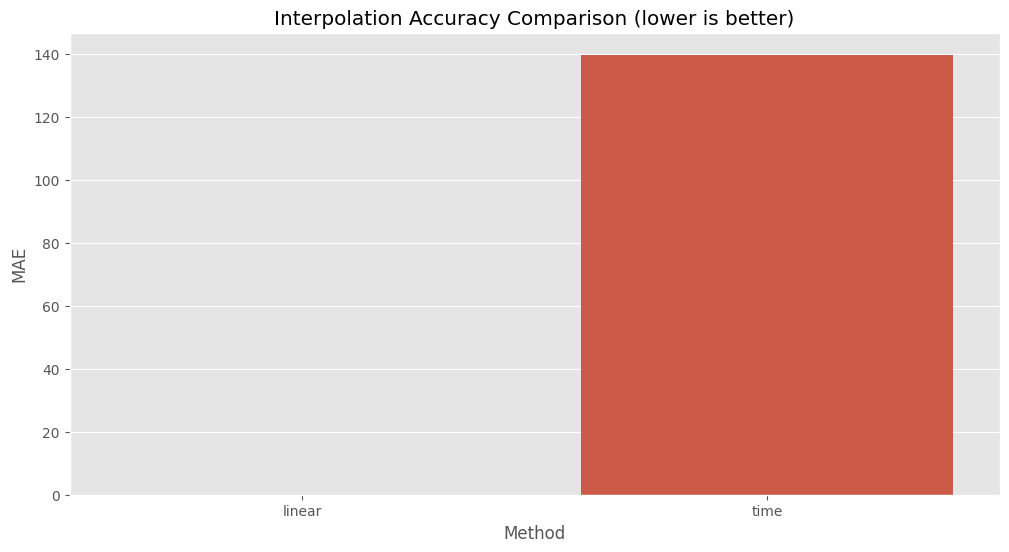

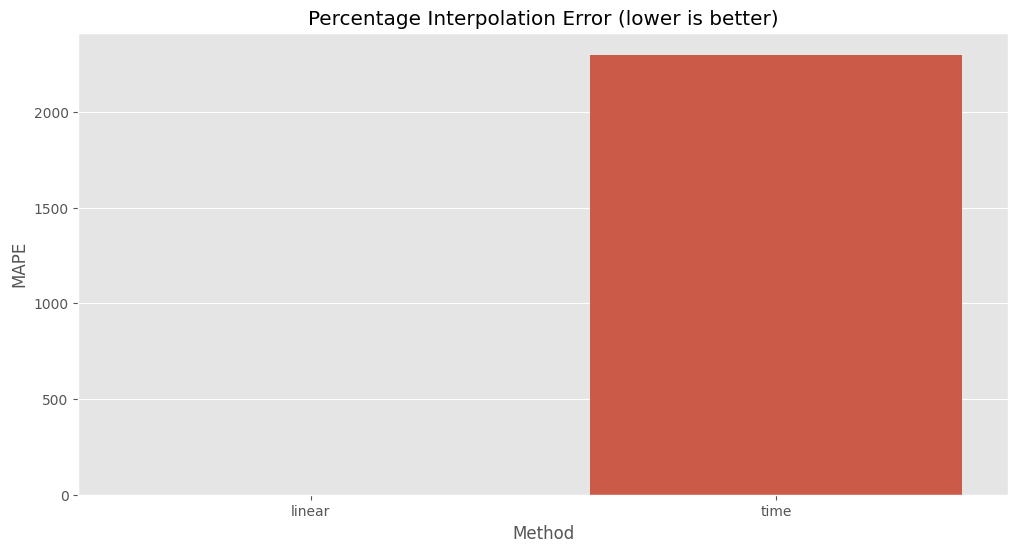

In [31]:
# Visualization of results
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='MAE', data=results)
plt.title('Interpolation Accuracy Comparison (lower is better)')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='MAPE', data=results)
plt.title('Percentage Interpolation Error (lower is better)')
plt.show()


## STEP 6 Feature engineering - Week day, month addition
consumption_C

In [32]:
consumption_C = raw_consumption_C_0_linear.copy()

In [33]:
# Rename the columns
consumption_C = consumption_C.rename(
    columns={
        'Energy_cons_linear': 'Energy_int_linear [kWh]', 
        'Energy_cons [kWh]': 'Energy_raw [kWh]',
    }
)

In [34]:
consumption_C

,Time,Energy_raw [kWh],User,Division Code,Division Name,Energy_int_linear [kWh]
1536781,2017-06-04 00:15:00,1.8156,U11,10,Manufacture of food products,1.8156
1536782,2017-06-04 00:30:00,1.8156,U11,10,Manufacture of food products,1.8156
1536783,2017-06-04 00:45:00,1.8156,U11,10,Manufacture of food products,1.8156
1536784,2017-06-04 01:00:00,1.8156,U11,10,Manufacture of food products,1.8156
1536785,2017-06-04 01:15:00,2.5140,U11,10,Manufacture of food products,2.5140
...,...,...,...,...,...,...
37748213,2019-05-17 14:00:00,19.3786,U255,33,Repair and installation of machinery and equip...,19.3786
37748214,2019-05-17 14:15:00,16.9465,U255,33,Repair and installation of machinery and equip...,16.9465
37748215,2019-05-17 14:30:00,15.8481,U255,33,Repair and installation of machinery and equip...,15.8481
37748216,2019-05-17 14:45:00,16.0835,U255,33,Repair and installation of machinery and equip...,16.0835


In [35]:
consumption_C.describe()


,Time,Energy_raw [kWh],Energy_int_linear [kWh]
count,35278605,2.740572e+07,3.527860e+07
mean,2019-07-04 11:22:16.395565056,1.023398e+02,9.664757e+01
min,2016-06-02 00:15:00,4.992669e-05,4.992669e-05
25%,2018-04-24 12:45:00,5.205700e+00,5.599400e+00
50%,2019-06-13 10:45:00,2.454660e+01,2.501150e+01
75%,2020-09-18 13:00:00,7.604610e+01,7.169220e+01
max,2022-08-10 23:45:00,7.977196e+03,7.977196e+03
std,NaN,2.866657e+02,2.715120e+02


In [36]:
consumption_C['Energy_raw [kWh]'] = consumption_C['Energy_raw [kWh]'].round(4)
consumption_C['Energy_int_linear [kWh]'] = consumption_C['Energy_int_linear [kWh]'].round(4)

In [37]:
consumption_C.columns

Index(['Time', 'Energy_raw [kWh]', 'User', 'Division Code', 'Division Name',
       'Energy_int_linear [kWh]'],
      dtype='object')

In [38]:
user_comparison = consumption_C.groupby('User').apply(
    lambda x: pd.Series({
        'Total_Energy_Raw': x['Energy_raw [kWh]'].sum(),
        'Total__Energy_Int': x['Energy_int_linear [kWh]'].sum(),
        'Diff_Energy_Total': x['Energy_int_linear [kWh]'].sum() - x['Energy_raw [kWh]'].sum(),
        'Pct_Energy_Change': ((x['Energy_int_linear [kWh]'].sum() - x['Energy_raw [kWh]'].sum()) 
                     / x['Energy_raw [kWh]'].sum() * 100)
    })
)
#sorted summary by the percentage
sorted_user_comparison = user_comparison.sort_values('Pct_Energy_Change', ascending=True)
print("\nRaw vs Interpolated Energy Comparison:")
print(sorted_user_comparison)


Raw vs Interpolated Energy Comparison:
      Total_Energy_Raw  Total__Energy_Int  Diff_Energy_Total  \
User                                                           
U196      2.294260e+06       2.294260e+06       0.000000e+00   
U210      6.297087e+06       6.297087e+06       0.000000e+00   
U189      6.723831e+04       6.723831e+04       0.000000e+00   
U185      2.398812e+06       2.398812e+06       0.000000e+00   
U90       3.335480e+05       3.335503e+05       2.225000e+00   
...                ...                ...                ...   
U60       3.526302e+06       1.052251e+07       6.996206e+06   
U177      2.811933e+05       8.665312e+05       5.853379e+05   
U229      3.805135e+06       1.173028e+07       7.925149e+06   
U154      3.537323e+06       1.348101e+07       9.943692e+06   
U117      1.076866e+06       4.742812e+06       3.665946e+06   

      Pct_Energy_Change  
User                     
U196           0.000000  
U210           0.000000  
U189           0.000000

C:\Users\dmarc\AppData\Local\Temp\ipykernel_30528\3945583983.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_comparison = consumption_C.groupby('User').apply(


In [39]:
# Select the user with the largest percentage energy change
user_largest = sorted_user_comparison.iloc[-1].name  # User with the highest percentage energy change

# Select the user with the smallest percentage energy change
user_smallest = sorted_user_comparison.iloc[0].name  # User with the lowest percentage energy change

# Select the user with the median percentage energy change
middle_index = len(sorted_user_comparison) // 2
user_middle = sorted_user_comparison.iloc[middle_index].name  # User with the median percentage energy change

# Print the selected users
print(f"User with the largest change: {user_largest}")
print(f"User with the smallest change: {user_smallest}")
print(f"User with the median change: {user_middle}")

# List of selected users for further analysis
selected_users = [user_largest, user_smallest, user_middle]

User with the largest change: U117
User with the smallest change: U196
User with the median change: U151


In [40]:
# Create dataframes for the selected users with columns 'Time' and 'Energy_int_linear [kWh]'
cons_max_U117 = consumption_C[consumption_C['User'] == user_largest][['Time', 'Energy_int_linear [kWh]','User']]
cons_min_U196 = consumption_C[consumption_C['User'] == user_smallest][['Time', 'Energy_int_linear [kWh]', 'User']]
cons_mid_U151 = consumption_C[consumption_C['User'] == user_middle][['Time', 'Energy_int_linear [kWh]', 'User']]

# Display the first few rows of each dataframe
print(cons_max_U117.head())
print(cons_min_U196.head())
print(cons_mid_U151.head())

                        Time  Energy_int_linear [kWh]  User
17461655 2017-07-15 00:15:00                   6.7967  U117
17461656 2017-07-15 00:30:00                   6.7967  U117
17461657 2017-07-15 00:45:00                   6.9327  U117
17461658 2017-07-15 01:00:00                   6.9327  U117
17461659 2017-07-15 01:15:00                   6.7967  U117
                        Time  Energy_int_linear [kWh]  User
28459255 2016-06-02 00:15:00                   7.5361  U196
28459256 2016-06-02 00:30:00                   7.5361  U196
28459257 2016-06-02 00:45:00                   6.7948  U196
28459258 2016-06-02 01:00:00                   4.4475  U196
28459259 2016-06-02 01:15:00                   5.4358  U196
                        Time  Energy_int_linear [kWh]  User
22129558 2017-08-02 16:00:00                 438.7805  U151
22129559 2017-08-02 16:15:00                 465.6996  U151
22129560 2017-08-02 16:30:00                 470.1861  U151
22129561 2017-08-02 16:45:00            

In [41]:
def create_comparison_table(selected_users, consumption_C, sorted_user_comparison):
    # Prepare data - handle both list and dictionary formats
    if isinstance(selected_users, dict):
        user_categories = selected_users.values()  # Just get the user IDs
    else:  # Assume list of user IDs
        user_categories = selected_users
    
    comparison_data = []
    
    for user_id in user_categories:
        user_data = consumption_C[consumption_C['User'] == user_id].copy()
        user_stats = sorted_user_comparison.loc[user_id]
        raw_energy = user_data['Energy_raw [kWh]']
        int_energy = user_data['Energy_int_linear [kWh]']
        
        # Collect metrics
        metrics = {
            'User ID': user_id,
            'Total Energy (raw)': f"{user_stats['Total_Energy_Raw']:,.1f} kWh",
            'Total Energy (int)': f"{user_stats['Total__Energy_Int']:,.1f} kWh",
            'Δ Energy': f"{user_stats['Diff_Energy_Total']:,.1f} kWh",
            '% Change': f"{user_stats['Pct_Energy_Change']:.1f}%",
            'Observation': len(user_data),
            'Mean (raw)': f"{raw_energy.mean():.1f}",
            'Mean (int)': f"{int_energy.mean():.1f}"
        }
        comparison_data.append(metrics)
    
    return pd.DataFrame(comparison_data).set_index('User ID')

# Create and display the comparison table
comparison_df = create_comparison_table(selected_users, consumption_C, sorted_user_comparison)


In [42]:
print("\nUSER ENERGY CONSUMPTION COMPARISON")
comparison_df


USER ENERGY CONSUMPTION COMPARISON


,Total Energy (raw),Total Energy (int),Δ Energy,% Change,Observation,Mean (raw),Mean (int)
User ID,,,,,,,
U117,"1,076,866.4 kWh","4,742,812.3 kWh","3,665,945.9 kWh",340.4%,148552,24.1,31.9
U196,"2,294,260.0 kWh","2,294,260.0 kWh",0.0 kWh,0.0%,147168,15.6,15.6
U151,"74,234,181.8 kWh","81,960,466.4 kWh","7,726,284.7 kWh",10.4%,148319,590.5,552.6


In [43]:
# 3 users to one df
df_cons_3U = pd.concat([cons_max_U117, cons_min_U196, cons_mid_U151], ignore_index=True)

In [44]:
df_cons_3U

,Time,Energy_int_linear [kWh],User
0,2017-07-15 00:15:00,6.7967,U117
1,2017-07-15 00:30:00,6.7967,U117
2,2017-07-15 00:45:00,6.9327,U117
3,2017-07-15 01:00:00,6.9327,U117
4,2017-07-15 01:15:00,6.7967,U117
...,...,...,...
444034,2021-10-25 14:30:00,552.7378,U151
444035,2021-10-25 14:45:00,624.5220,U151
444036,2021-10-25 15:00:00,509.6674,U151
444037,2021-10-25 15:15:00,538.3810,U151


In [62]:
print(df_cons_3U.isna().sum())

Time                       0
Energy_int_linear [kWh]    0
User                       0
dtype: int64


In [45]:
df_cons_3U.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444039 entries, 0 to 444038
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Time                     444039 non-null  datetime64[ns]
 1   Energy_int_linear [kWh]  444039 non-null  float64       
 2   User                     444039 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.2+ MB


In [46]:
# Sort and reset index 
df_cons_3U = df_cons_3U.sort_values(['User', 'Time']).reset_index(drop=True)

In [66]:
df_cons_3U.to_csv('Energy_C_cons_3U.csv', index=False)

## Additional step -  merge with UserLocation
cons_City

In [47]:
import os
filepath = r'C:/Users/dmarc/Desktop/Energy_project/data/EWELD_raw/User Location'
# Take all CSV files in folder structure
all_csv_files = []
for root, dirs, files in os.walk(filepath):
    for file in files:
        if file.endswith('.csv'):
            full_path = os.path.join(root, file)
            all_csv_files.append(full_path)

print(f"Found {len(all_csv_files)} CSV files total")

Found 3 CSV files total


In [48]:
# List to hold all dataframes
dataframe = []

for file in os.listdir(filepath):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(filepath, file))
        # Add filename column (without .csv)
        df['source_file'] = file[:-4]
        dataframe.append(df)

# List to  dataframes
location_data = pd.concat(dataframe)

In [49]:
# remove the prefix U_
location_data['source_file'] = location_data['source_file'].str.replace('U_', '', regex=False)
#  Rename the column
location_data = location_data.rename(columns={'source_file': 'City', 'User No.': 'User'})


In [50]:
location_data.sample(11)

,User,City
121,U127,CT2
33,U36,CT2
5,U6,CT2
294,U306,CT2
229,U238,CT2
172,U179,CT2
161,U168,CT2
45,U48,CT2
56,U60,CT2
3,U103,CT1


In [51]:
cons_City = consumption_C.copy()

In [52]:
cons_City = pd.merge(
    cons_City ,
    location_data,
    on=['User'],
    how='left'
)


In [53]:
cons_City.head()

,Time,Energy_raw [kWh],User,Division Code,Division Name,Energy_int_linear [kWh],City
0,2017-06-04 00:15:00,1.8156,U11,10,Manufacture of food products,1.8156,CT2
1,2017-06-04 00:30:00,1.8156,U11,10,Manufacture of food products,1.8156,CT2
2,2017-06-04 00:45:00,1.8156,U11,10,Manufacture of food products,1.8156,CT2
3,2017-06-04 01:00:00,1.8156,U11,10,Manufacture of food products,1.8156,CT2
4,2017-06-04 01:15:00,2.5140,U11,10,Manufacture of food products,2.5140,CT2


## merge with weather data
cons_City_weather

In [54]:
cons_City_weather = cons_City.copy()

In [ ]:
weather_data_with_extreme = pd.read_csv(r"\processed\weather_data_with_extreme.csv")

In [160]:
# Convert 'Time' column to datetime
weather_data_with_extreme['Time'] = pd.to_datetime(weather_data_with_extreme['Time'])

In [ ]:
weather_data_with_extreme.dtypes

Time               datetime64[ns]
Temperature(C)            float64
Dew Point(C)              float64
Humidity(%)               float64
Wind                       object
Wind Speed(mph)           float64
Wind Gust(mph)            float64
Pressure(hPa)             float64
Condition                  object
City                       object
Extreme Weather            object
EWno                        int64
dtype: object

In [171]:
cons_City_weather = pd.merge(
    cons_City_weather ,
    weather_data_with_extreme,
    on=['Time', 'City'],
    how='left'
)


In [173]:
print("Data types:\n", cons_City_weather.dtypes)

Data types:
 Time                datetime64[ns]
Energy_raw [kWh]           float64
User                        object
Section                     object
Division Code               object
Division Name               object
Energy_int [kWh]           float64
Week_Day                    object
Week_Day_Num                 int32
Month_Name                  object
City                        object
Temperature(C)             float64
Dew Point(C)               float64
Humidity(%)                float64
Wind                        object
Wind Speed(mph)            float64
Wind Gust(mph)             float64
Pressure(hPa)              float64
Condition                   object
Extreme Weather             object
EWno                         int64
dtype: object


## Step 7 Time paterns
consumption_TimeIndex

In [174]:
consumption_TimeIndex = cons_City_weather.copy()

In [ ]:

cons_City_weather = cons_City_weather.sort_values('Time')

# rolling window
window_sizes = [3, 7, 14, 28]  # day windows

for window in window_sizes:
    cons_City_weather[f'Energy_int_Avg_{window}d'] = cons_City_weather['Energy_int [kWh]'].rolling(f'{window}D', on='Time').mean()
    
    cons_City_weather[f'Energy_int_Median_{window}d'] = cons_City_weather['Energy_int [kWh]'].rolling(f'{window}D', on='Time').median()
    
    cons_City_weather[f'Energy_int_Std_{window}d'] = cons_City_weather['Energy_int [kWh]'].rolling(f'{window}D', on='Time').std()
    
    cons_City_weather[f'Energy_int_Sum_{window}d'] = cons_City_weather['Energy_int [kWh]'].rolling(f'{window}D', on='Time').sum()

print(cons_City_weather[['Time', 'Energy_int [kWh]', 
                         'Energy_int_Avg_3d', 'Energy_int_Median_3d', 
                         'Energy_int_Std_3d', 'Energy_int_Sum_3d']].head(10))

In [175]:
# 'Time' is a datetime  to index
consumption_TimeIndex = consumption_TimeIndex.set_index('Time')

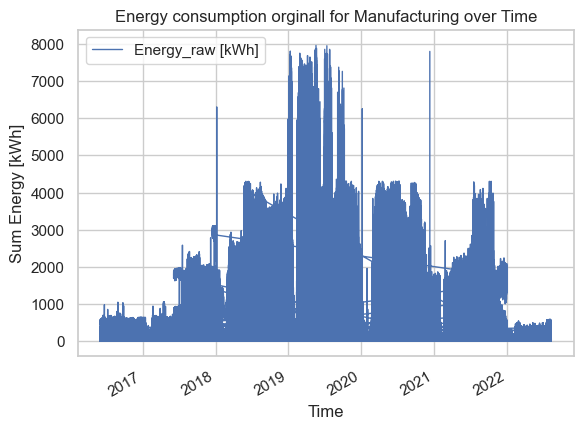

In [ ]:
import matplotlib.pyplot as plt 
#  plot without specifying x, since the index is Time
consumption_TimeIndex['Energy_raw [kWh]'].plot(kind='line', legend=True, linewidth=1, color='b')
plt.title('Energy consumption orginall for Manufacturing over Time')
plt.xlabel('Time')
plt.ylabel('Sum Energy [kWh]')
plt.grid(True)
plt.show()

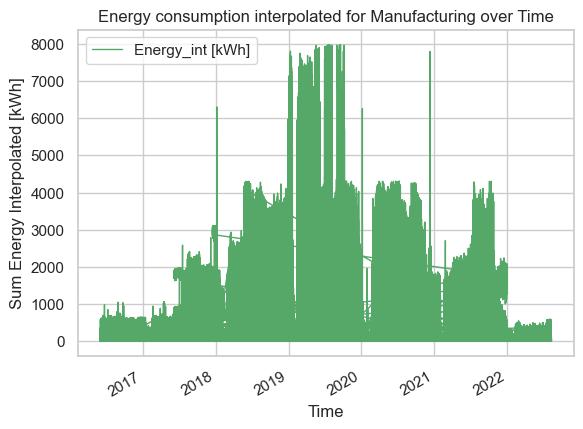

In [176]:
import matplotlib.pyplot as plt 
#  plot without specifying x, since the index is Time
consumption_TimeIndex['Energy_int [kWh]'].plot(kind='line', legend=True, linewidth=1, color='g')
plt.title('Energy consumption interpolated for Manufacturing over Time')
plt.xlabel('Time')
plt.ylabel('Sum Energy Interpolated [kWh]')
plt.grid(True)
plt.show()

In [134]:
print("Actual columns in DataFrame:", consumption_C.columns.tolist())

Actual columns in DataFrame: ['User', 'Section', 'Division Code', 'Division Name', 'Energy [kWh]', 'Week_Day', 'Week_Day_Num']


In [ ]:
# Drop the unwanted column
consumption_C = consumption_C.drop(columns=['Energy_cons [kWh]'])

# Rename the column
consumption_C = consumption_C.rename(columns={'Energy_cons_interpolated': 'Energy [kWh]'})

# View the result
print(consumption_C.head())

In [76]:
location_data = pd.read_csv(r"C:\Users\dmarc\Desktop\Energy_project\data\processed\location_data.csv")

In [78]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    386 non-null    object
 1   City    386 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [80]:
energy_combined = pd.merge(
    consumption_C,
    location_data[['User', 'City']],
    on='User',
    how='left'
)

In [81]:
#columns with at least one NaN
energy_combined.isna().sum()

Time                       0
User                       0
Section                    0
Division Code              0
Division Name              0
Energy_consumption[kWh]    0
City                       0
dtype: int64

In [86]:
energy_combined.sample(10)


,Time,User,Section,Division Code,Division Name,Energy_consumption[kWh],City
28313070,2021-04-17 10:15:00,U211,C,26,"Manufacture of computer, electronic and optica...",47.1354,CT2
34074806,2021-09-25 04:00:00,U247,C,31,Manufacture of furniture,17.6406,CT2
4895335,2018-08-16 22:45:00,U43,C,14,Manufacture of wearing apparel,4.1413,CT2
11139872,2020-10-08 09:15:00,U84,C,22,Manufacture of rubber and plastics products,1.0205,CT2
20052888,2020-02-14 01:30:00,U153,C,24,Manufacture of basic metals,103.4978,CT2
1393157,2019-08-04 00:30:00,U20,C,11,Manufacture of beverages,75.4230,CT2
16032579,2016-10-17 20:15:00,U122,C,23,Manufacture of other non-metallic mineral prod...,41.2406,CT2
14685246,2018-07-04 02:30:00,U110,C,23,Manufacture of other non-metallic mineral prod...,130.8834,CT2
4612285,2018-05-08 18:30:00,U40,C,13,Manufacture of textiles,45.4127,CT2
1231582,2019-07-23 22:30:00,U19,C,11,Manufacture of beverages,0.1151,CT1


In [88]:
energy_combined['City'].unique()


array(['CT2', 'CT1', 'CT3'], dtype=object)

In [ ]:
combined_df.to_parquet(r'data\processed\energy_combined_C.parquet', index=False)